# Machine Learning Classification

The idea with this script is to itterate into a functional machine learning classification script which can:
- **Apply multiple different ML models for classification**
- Introduce a system to quickly change model hyperparameters
- **Display the accuracy of the model** (and/or other metrics)
- Display the feature importance for the models
- Add a voting system (or multiple voting systems)
- Make a Baysian models to auto adjust hyperparameters via gradient decent
- Add in multiple crossvalidation stratedgies **(just k-fold atm)**
    - statified k-fold

**Bold == Done**

In [21]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)

In [5]:
%store -r train_features
%store -r train_labels
%store -r valid_features
%store -r valid_labels

## Defining the Models

TODO: Add in simple hyperparameter tuning!

In [24]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('xTrees', ExtraTreesClassifier(n_estimators=100))) #this is exactly the same as above right now
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('SVC', SVC(kernel = 'linear', C = 0.025)))
##TODO: Add Neural Network Classification Models


#some parameters have been defined to avoid error messages

In [26]:
LogisticRegression(solver='lbfgs', max_iter=1000)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Train the Models

LR: 0.813997 (0.044459)
LDA: 0.802778 (0.051941)
KNN: 0.771590 (0.066398)
CART: 0.772824 (0.040352)
NB: 0.784012 (0.042622)
SVM: 0.808951 (0.060320)
XGB: 0.832731 (0.049345)
RF: 0.808997 (0.042548)
xTrees: 0.810231 (0.036165)
ABC: 0.821451 (0.048821)
GBC: 0.826512 (0.049943)
SVC: 0.812747 (0.047704)


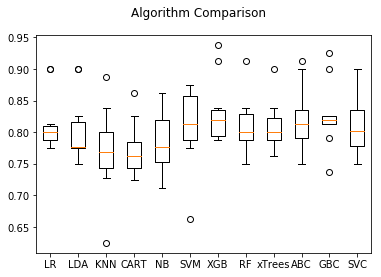

In [25]:
# evaluate each model in turn
seed = 7
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, train_features, train_labels, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
scoring = ['accuracy', 'precision', 'recall']
accuracy_df = pd.DataFrame(index= scoring)
importance_df = pd.DataFrame(index= train.columns)
predictions = []
CROSS_VALIDATION_NUMBER = 5
##TODO: Add Random Seed Number

for classifier in classifiers:
    print('Currently Modelling Using', classifier[0])
    model = classifier[1].fit(train_features, train_labels)
    predictions.append(model.predict(valid_features))
    errors = abs(predictions - valid_labels)
    
    if classifier[2] == 0:
        importance_df[classifier[0]] = classifier[1].feature_importances_
    if classifier[2] == 1:
        importance_df[classifier[0]] = abs(classifier[1].coef_[0])
        
    for i in scoring:
        xval_score = cross_val_score(model, valid_features, valid_labels, cv=CROSS_VALIDATION_NUMBER, scoring=i)
        accuracy_df.loc[i, classifier[0]] = np.mean(xval_score)
        
    ## ADD a field to store predictions